# Loan Approval Prediction

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan_prediction.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df=df.drop('Loan_ID',axis=1)

In [6]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The data has missing values both in numerical as well as categorical 
values. Lets look at the descriptive status of the dataset for filling the 
missing values.

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In categorical columns, we can fill in missing values with the mode of each column .

In [9]:
# Fill missing values in categorical columns with mode

df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

<AxesSubplot:xlabel='LoanAmount'>

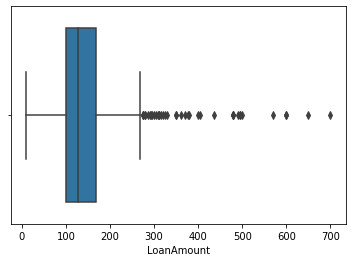

In [10]:
# Loan Amount is discrete -- Median is a good option

sns.boxplot(df['LoanAmount'])

In [11]:
# The skewness is good for a good median

df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [12]:
# Loan_Amount_Term with mode since it has discrete values

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [13]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [14]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [15]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## EDA

In [16]:
loan_status_count = df['Loan_Status'].value_counts()

In [17]:
loan_status_count

Y    422
N    192
Name: Loan_Status, dtype: int64

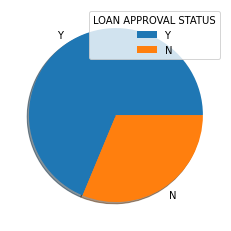

In [18]:
plt.pie(loan_status_count,shadow=True,labels=loan_status_count.index)
plt.legend(title='LOAN APPROVAL STATUS')
plt.show()

In [19]:
# Gender Distribution
gender_count=df['Gender'].value_counts()

In [20]:
gender_count

Male      502
Female    112
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Gender Distribution')

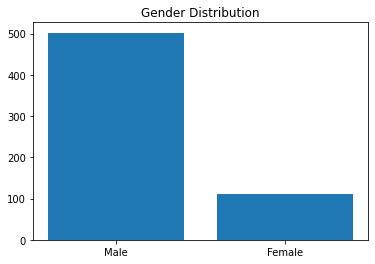

In [21]:
plt.bar(gender_count.index,gender_count.values,align='center')
plt.title('Gender Distribution')

In [22]:
married_count = df['Married'].value_counts()

In [23]:
married_count

Yes    401
No     213
Name: Married, dtype: int64

Text(0.5, 1.0, 'Marital Status Distribution')

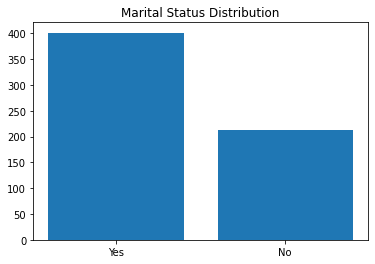

In [24]:
plt.bar(married_count.index,married_count.values,align='center')
plt.title('Marital Status Distribution')

In [25]:
# Now Let's have a look atbthe distribution of the education column:

In [26]:
education_count=df['Education'].value_counts()

In [27]:
education_count

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Text(0.5, 1.0, 'Education Distribution')

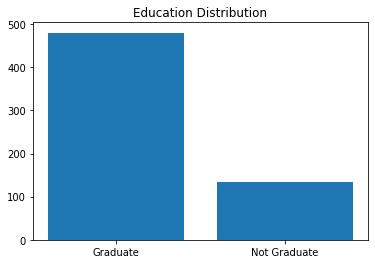

In [28]:
plt.bar(education_count.index,education_count.values,align='center')
plt.title('Education Distribution')

In [29]:
# Now let's have a look at the distribution of the self-employment column:

In [30]:
self_employed_count=df['Self_Employed'].value_counts()

In [31]:
self_employed_count

No     532
Yes     82
Name: Self_Employed, dtype: int64

Text(0.5, 1.0, 'Self-Employment Distribution')

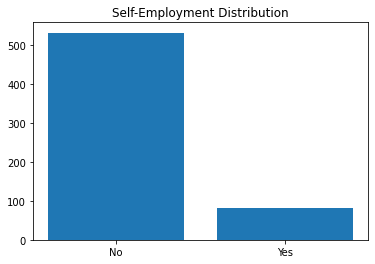

In [33]:
plt.bar(self_employed_count.index,self_employed_count.values,align='center')
plt.title('Self-Employment Distribution')

In [34]:
# Now let's have a look at the distribution of the Applicant Income Column:

<AxesSubplot:xlabel='ApplicantIncome'>

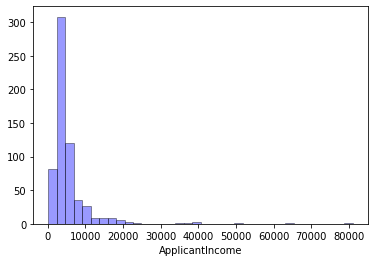

In [36]:
sns.distplot(df['ApplicantIncome'],hist=True,kde=False,bins=int(180/5),color='blue',hist_kws={'edgecolor':'black'})

In [37]:
# Now let's have a look at the relationship between the income of the loan,
# applicant and the loan status

Text(0.5, 1.0, 'Loan_Status vs ApplicantIncome')

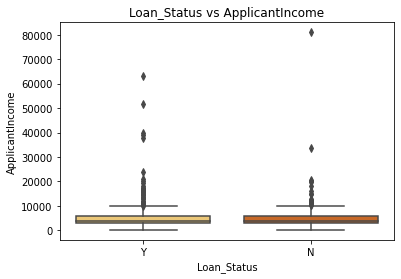

In [40]:
sns.boxplot(x="Loan_Status",y="ApplicantIncome",data=df,palette="YlOrBr");
plt.title('Loan_Status vs ApplicantIncome')

In [41]:
# The ApplicantIncome column contains outliers which need to be removed 
# before moving further. Here's how to remove the outliers

In [44]:
Q1=df['ApplicantIncome'].quantile(0.25)
Q3=df['ApplicantIncome'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)

df=df[(df['ApplicantIncome']>=lower_bound) & (df['ApplicantIncome']<= upper_bound)]

Text(0.5, 1.0, 'Loan_Status vs CoApplicantIncome')

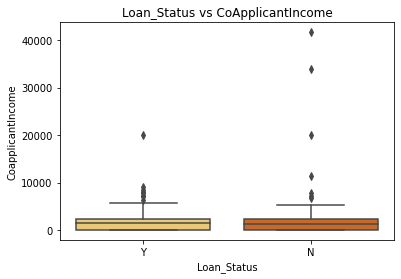

In [45]:
sns.boxplot(x="Loan_Status",y="CoapplicantIncome",data=df,palette="YlOrBr");
plt.title('Loan_Status vs CoApplicantIncome')

In [47]:
### Prediction Model

# Conert Categorical columns to numerical using one-hot encoding

cat_cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
df=pd.get_dummies(df,columns=cat_cols)

In [48]:
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
# SCale the numerical column using StandardScaler
scaler=StandardScaler()
numerical_cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
X_train[numerical_cols]=scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols]=scaler.fit_transform(X_test[numerical_cols])

In [53]:
from sklearn.svm import SVC

In [54]:
model=SVC(random_state=42)
model.fit(X_train,y_train)

SVC(random_state=42)

In [55]:
y_pred=model.predict(X_test)
y_pred

array(['Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y'], dtype=object)

In [ ]:
X_test_d